# 1. Plants Visualization

In this notebook we'll work with the geographic information of all the plants sites of the database. Working with this notebook can give one insight into the parameters for the clustering as well as the regions on which the plants are located.

In [1]:
from modules import data_preparation
from modules import geographical_analysis
from modules import geographical_plotting

#### 1.1 Metadata of Every Solar Plant on the Database.
We read the .csv files which we builded on `0_DataPreparation.ipynb` to load plants metadata.

In [2]:
meta_UPV, meta_DPV = data_preparation.get_plants_files_metadata( read = True, PATH = './data/Extracted/', UPV = True, DPV = True, to_csv = False)

#### 1.2 Construction of the Geographic Dataframes 
We create the geo_dataframes with an extra attribute for the coordinates. We do it for both UPV and DPV technologies.

In [3]:
geo_df_UPV = geographical_plotting.geographic_data(meta_UPV)
geo_df_DPV = geographical_plotting.geographic_data(meta_DPV)

#### 1.3 Full Plant Dataset Visualization
We show on a map with a particular delimited region all the plants within that region filtered by the type of technology `[UPV, DPV]` and the precision of the map `[national, states, countys]`.

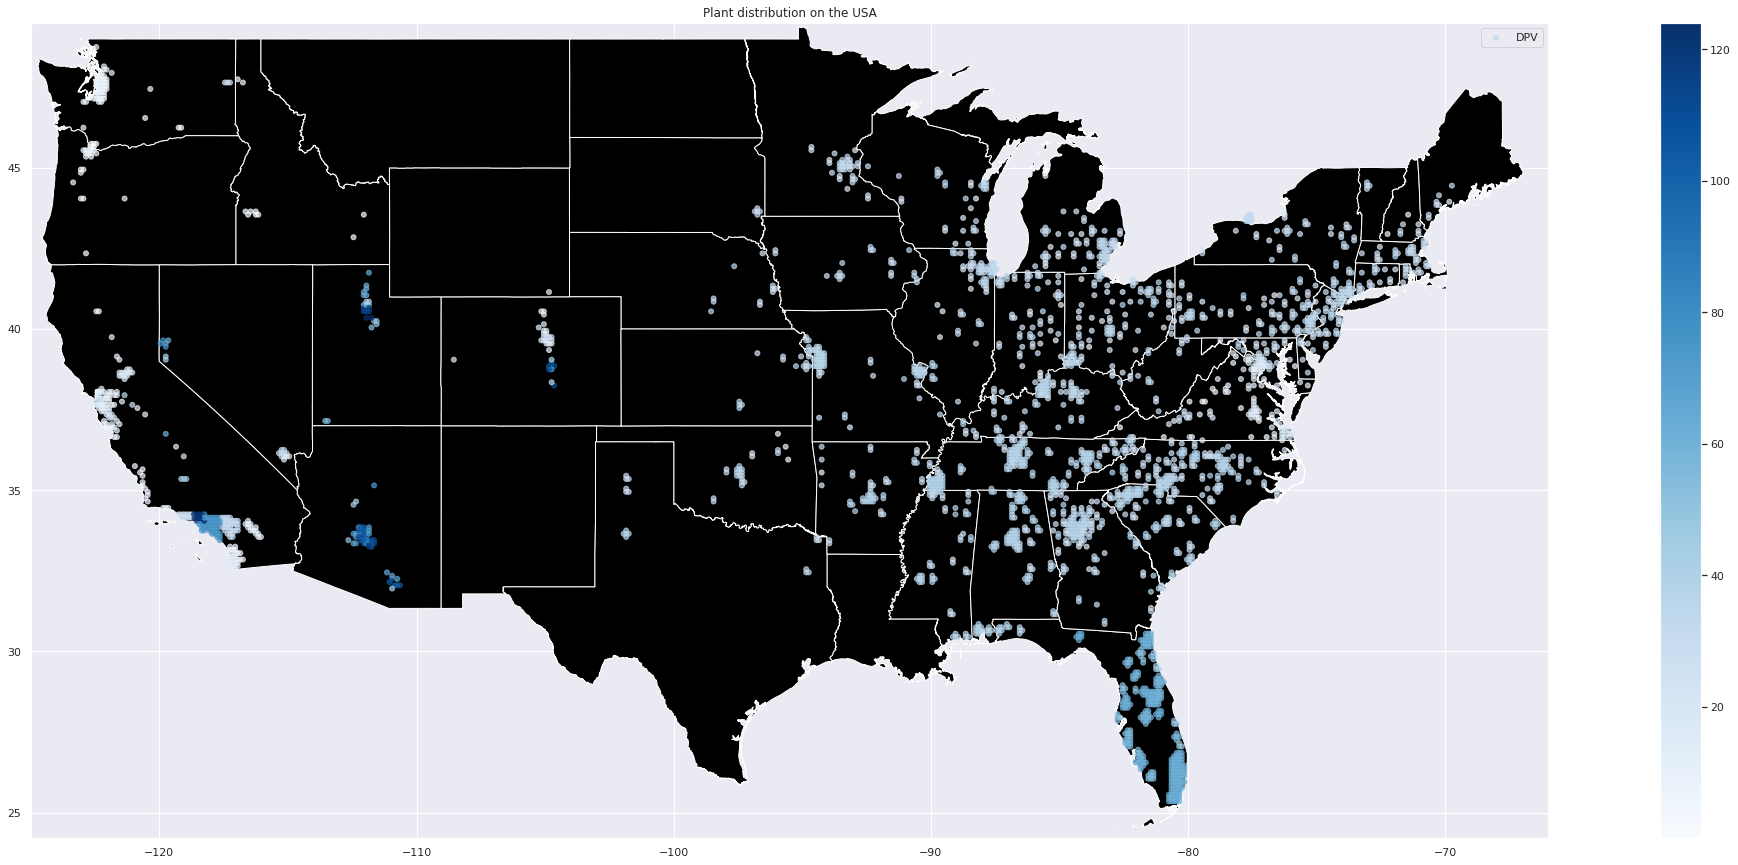

In [4]:
geographical_plotting.plants_visualization(geo_df_DPV, map_precision = 'states', BBox = (-125.00, -66.00, 24.20, 49.50), tech = 'DPV')

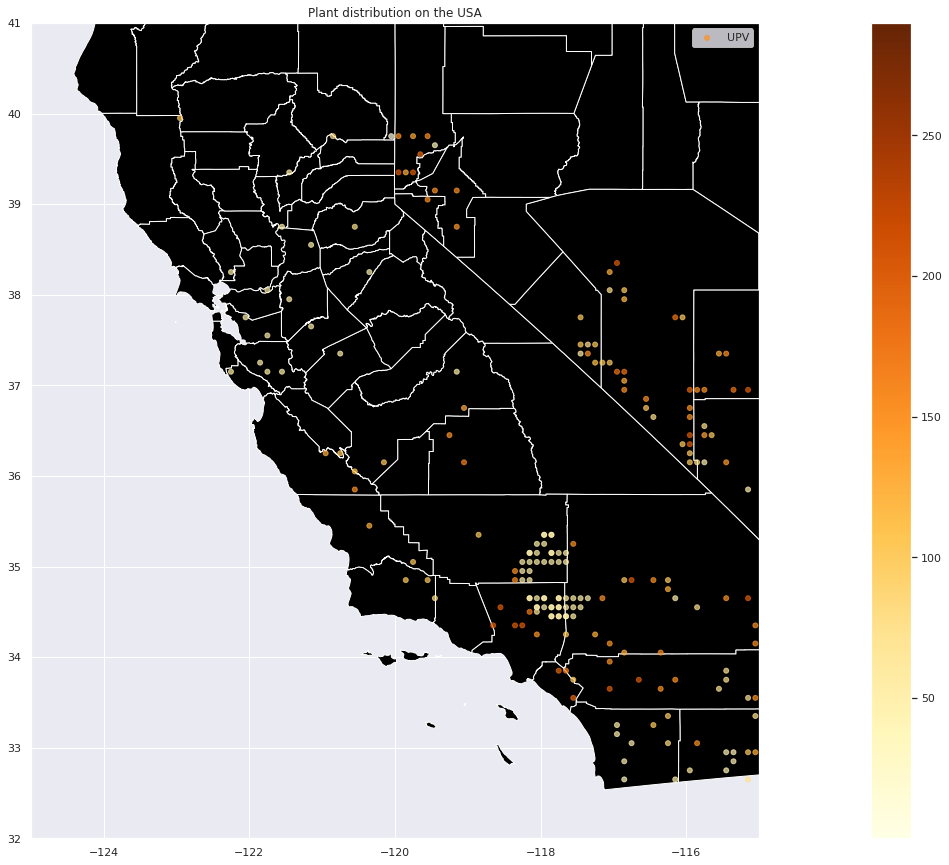

In [5]:
geographical_plotting.plants_visualization(geo_df_UPV, map_precision = 'countys', BBox = (-125.00, -115.00, 32.00, 41.00), tech = 'UPV')

#### 1.4 Plant Clusters Visualization
We perform the clustering to obtain the labeled geo_dataframe and we plot afterwards the groups. We invite you to change the `N_clusters`parameter to visualize how the segmentation changes. The bounding box delimits just the map, not the segmentation groups.
We can introduce a particular coordinate point to plot it along the clusters to see the relation between them.

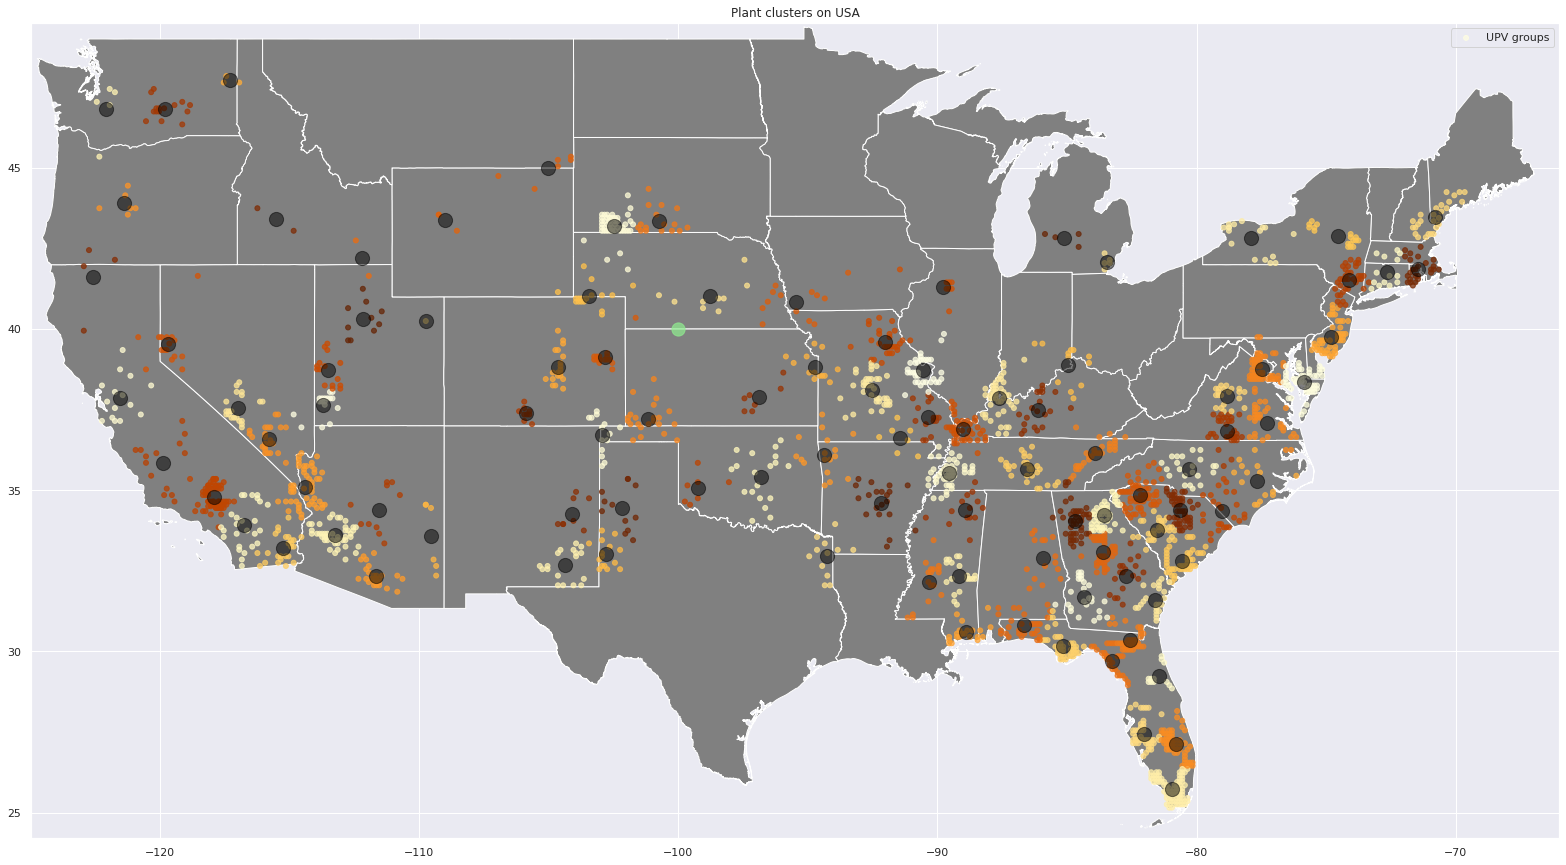

In [6]:
geo_df_UPV_labeled, centers_df_UPV = geographical_analysis.geographical_plant_clustering(geo_df_UPV, N_clusters = 100 )
geographical_plotting.plant_cluster_plotting(geo_df_UPV_labeled, centers_df_UPV, map_precision = 'states', BBox = (-125.00, -66.00, 24.20, 49.50), tech = 'UPV', coords = (-100,40))

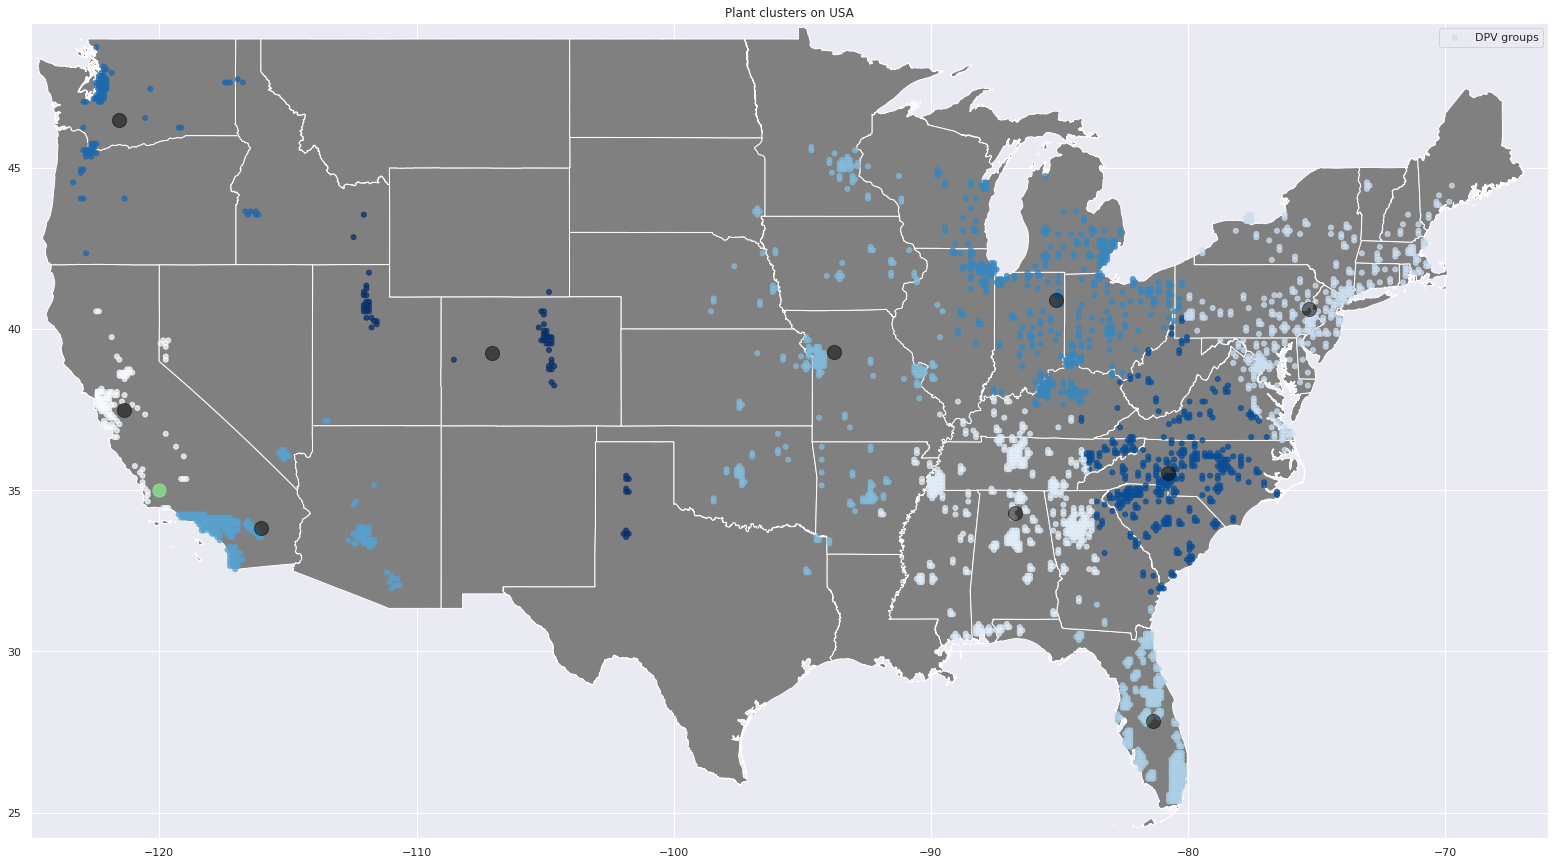

In [7]:
geo_df_DPV_labeled, centers_df_DPV = geographical_analysis.geographical_plant_clustering(geo_df_DPV, N_clusters = 10 )
geographical_plotting.plant_cluster_plotting(geo_df_DPV_labeled, centers_df_DPV, map_precision = 'states', BBox = (-125.00, -66.00, 24.20, 49.50), tech = 'DPV', coords = (-120.00, 35.00))

-----